# Particle Filter on Episode

千葉工業大学 上田 隆一

(c) 2017 Ryuichi Ueda

This software is released under the MIT License, see LICENSE.

## はじめに

このコードは、上田が https://link.springer.com/chapter/10.1007/978-3-319-48036-7_54 で公表した「particle filter on episode」というアルゴリズムです。簡単なタスクを学習できますが、まだ弱いです。

In [1]:
%matplotlib inline
import numpy as np
from copy import copy
import math, random
import matplotlib.pyplot as plt                   #   for plotting data
from matplotlib.patches import Ellipse      #  for drawing

## 環境のクラス

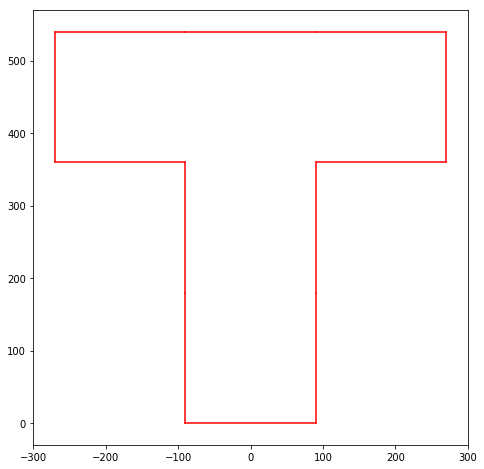

In [2]:
fig = plt.figure(0,figsize=(8, 8))
p = fig.add_subplot(111, aspect='equal')
p.set_xlim(-300,300)
p.set_ylim(-30,570)

class Wall:
    def __init__(self,x1,y1,x2,y2):
        self.p1 = np.array([x1,y1]).T
        self.p2 = np.array([x2,y2]).T

class Environment:
    def __init__(self):
        self.walls = [Wall(-90.0,0.0,90.0,0.0), 
                      Wall(90.0,0.0,90.0,180.0), Wall(90.0,180.0,90.0,360.0), 
                      Wall(90.0,360.0,270.0,360.0), 
                      Wall(270.0,360.0, 270.0, 540.0),
                      Wall(270.0, 540.0,90.0,540.0), Wall(90.0,540.0,-90.0,540.0), Wall(-90.0,540.0,-270,540.0),
                      Wall(-270.0, 540.0, -270.0, 360.0), 
                      Wall( -270.0, 360.0, -90.0, 360.0,),
                      Wall(-90.0,0.0,-90.0,180.0), Wall(-90.0,180.0,-90.0,360.0), 
                     ]
        
    def draw(self,p):
        for w in self.walls:
            p.plot([w.p1[0],w.p2[0]],[w.p1[1],w.p2[1]],color="red")

env = Environment()
env.draw(p)

## イベント、エピソードのクラス

記憶をモデル化します。行動に必要な情報は、結局のところどう動いて何を見て、どんな良いこと・悪いことがあったか、だけになります。

In [19]:
class Event:
    TIME = 0
    def __init__(self,action,reward,observation):
        self.action = action
        self.reward = reward
        self.observation = observation
        self.time = TIME
        TIME += 1
        
    def __str__(self):
        return "action:" + str(self.action) + "\t" + "reward:" + str(self.reward) + "\t" + "observation:" + str(self.observation)
        
class Episodes:   #強化学習では一つの試行をエピソードと呼ぶ。このクラスは複数のエピソードをずーっとシーケンシャルに持つので、Episodesと複数形に。
    def __init__(self):
        self.events = []
        
    def __str__(self):
        es = []
        for e in self.events:
            es.append(str(e))
        
        return "\n".join(es)

## ロボットのクラス

Environmentのインスタンスを持って環境と相互作用しながら記憶を蓄積していきます。

In [25]:
class Action:
    def __init__(self,name,fw,rot):
        self.name = name
        self.fw = fw
        self.rot = rot

class Robot:
    def __init__(self,env):
        self.episodes = Episodes()
        self.environment = env
        
        self.actions = [Action("fw",100.0,0.0), Action("cw",0.0,-90.0), Action("ccw",0.0,90.0)]
        
    def observe(self):
        return None
    
    def __motion(self, pos, fw, rot):
        actual_fw = random.gauss(fw,fw/10)    #標準偏差にしてfwの10%だけ移動距離に雑音を入れる
        dir_error = random.gauss(0.0, math.pi / 180.0 * 3.0) # 前進時にロボットの進路が曲がる雑音。標準偏差3[deg] 
        
        px, py, pt = pos
        
        #前進させる
        x = px + actual_fw * math.cos(pt + dir_error)
        y = py + actual_fw * math.sin(pt + dir_error)
        
        #回転。回転角にもrotの10%だけ雑音を入れる
        t = pt + dir_error + random.gauss(rot,rot/10)
        
        return np.array([x,y,t])
    
    def move(self,action):
        
        return self.__motion()
        
    def one_step(self,action):
        pass
        

## 実行

In [21]:
robot = Robot(Environment())

In [22]:
print(robot.episodes)